[Scikit-learn](#scikit_learn)
- [SLR (without sklearn)](#slr)
- [SciKit Learn](#scikit)
  - [Intro to Scikit-learn](#Intro)
  - [Creating a Model (Estimator)](#Model_creation)
  - [Fit/Train the Model on the training data](#fitting)
  - [Understanding and utilizing the Model](#understanding)
    - [Evaluation on the Test Set](#test_set_evaluation)
        - [Calculate Performance on Test Set](#performance)
    - [Residuals](#Residuals)
        - [anscombes_quartet1.csv](#anscombes_quartet1)
        - [anscombes_quartet2.csv](#anscombes_quartet2)
        - [anscombes_quartet4.csv](#anscombes_quartet4)
        - [Plotting Residuals](#Plotting_Residuals)
  - [Retraining Model on Full Data](#retraining)
    - [Deployment, Predictions, and Model Attributes](#dpm)
      - [Final Model Fit](#final_model_fit)
      - [Residuals](#residuals_2)
      - [Coefficients](#Coefficients)
      - [Prediction on New Data](#predictions_on_new_data)
  - [Model Persistence (Saving and Loading a Model)](#Model_Persistence)
  - [Up next...](#next)

<h4><a id="slr">SLR (without sklearn)</a></h4>

In [1]:
import numpy as np
import pandas as pd
from ipynb.fs.defs._2_Pandas import hide_toggle
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import subprocess
import sys
from IPython.display import display,HTML


def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install",package])   
#install("jupyter_contrib_nbextensions")
install("scikit-learn")   # for importing functions from other .ipynb files
hide_toggle()


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
df = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df['total_spent'] = df["TV"] + df["radio"] + df["newspaper"] + df["sales"]
df

,TV,radio,newspaper,sales,total_spent
0,230.1,37.8,69.2,22.1,359.2
1,44.5,39.3,45.1,10.4,139.3
2,17.2,45.9,69.3,9.3,141.7
3,151.5,41.3,58.5,18.5,269.8
4,180.8,10.8,58.4,12.9,262.9
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,63.3
196,94.2,4.9,8.1,9.7,116.9
197,177.0,9.3,6.4,12.8,205.5
198,283.6,42.0,66.2,25.5,417.3


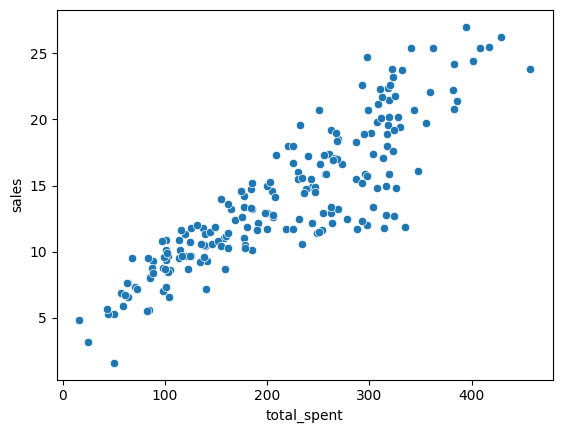

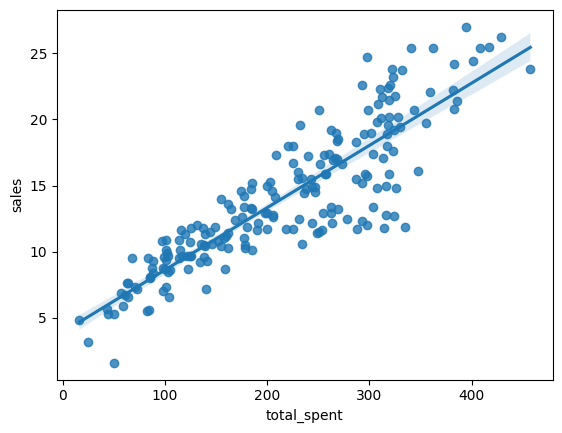

<AxesSubplot: xlabel='total_spent', ylabel='sales'>

None

<AxesSubplot: xlabel='total_spent', ylabel='sales'>

None

In [6]:
display(
    sns.scatterplot(
        data=df,
        x = "total_spent",
        y = "sales",
    ),
    plt.show(),
    sns.regplot(  # with line
        data=df,
        x = "total_spent",
        y = "sales",
    ),
    plt.show(),
    
)

In [7]:
X = df["total_spent"]
Y = df["sales"]
display('''In the equation (y = B1x + B0), B1 is : %s and B0 is %s''' % (list(np.polyfit(X,Y,deg=1))[0], list(np.polyfit(X,Y,deg=1))[1]))

'In the equation (y = B1x + B0), B1 is : 0.04710144798456777 and B0 is 3.90119955273212'

### Potential spend

##### Degree = 1

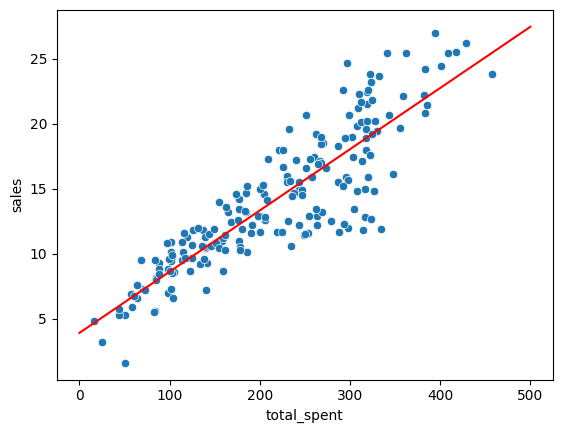

In [8]:
potential_spend = np.linspace(0,500,100)
predicted_sales = list(np.polyfit(X,Y,deg=1))[0]*potential_spend + list(np.polyfit(X,Y,deg=1))[1]
sns.scatterplot(x="total_spent",y="sales",data=df)
plt.plot(potential_spend , predicted_sales,color="red") # straight line

##### Degree = 10

<AxesSubplot: xlabel='total_spent', ylabel='sales'>

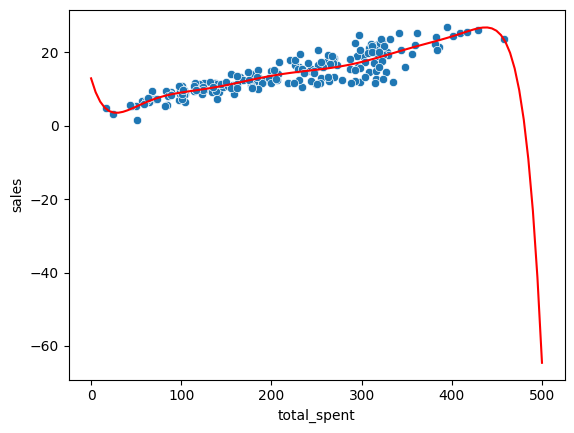

In [9]:
li = list(np.polyfit(X,Y,deg=10))
predicted_sales_1 = 0
for i in range(len(li)):
    predicted_sales_1 += (li[i]*(potential_spend**(len(li)-i-1)))
display(
    sns.scatterplot(x="total_spent",y="sales",data=df),
    plt.plot(potential_spend , predicted_sales_1,color="red")
)

##### Degree = 100

/Users/sreedhar.k/.pyenv/versions/3.8.0/lib/python3.8/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/sreedhar.k/.pyenv/versions/3.8.0/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot: xlabel='total_spent', ylabel='sales'>

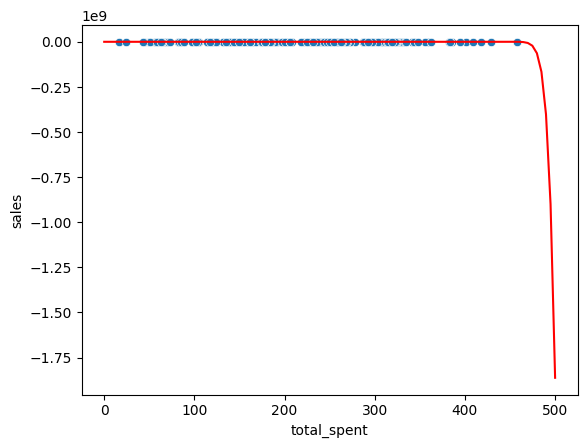

In [10]:
li = list(np.polyfit(X,Y,deg=100))
predicted_sales_2 = 0
for i in range(len(li)):
    predicted_sales_2 += (li[i]*(potential_spend**(len(li)-i-1)))
display(
    sns.scatterplot(x="total_spent",y="sales",data=df),
    plt.plot(potential_spend , predicted_sales_2,color="red")
)

##### Degree = 115  
- Maximum limit for the degree in SLR. Beyond this, it will show the following error:
  - LinAlgError: SVD did not converge in Linear Least Squares

/Users/sreedhar.k/.pyenv/versions/3.8.0/lib/python3.8/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/sreedhar.k/.pyenv/versions/3.8.0/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/var/folders/vh/30ml2jmd6t76y5lwy1jflql5f0c2kc/T/ipykernel_74609/1786836635.py:4: RuntimeWarning: overflow encountered in power
  predicted_sales_3 += (li[i]*(potential_spend**(len(li)-i-1)))
/var/folders/vh/30ml2jmd6t76y5lwy1jflql5f0c2kc/T/ipykernel_74609/1786836635.py:4: RuntimeWarning: invalid value encountered in multiply
  predicted_sales_3 += (li[i]*(potential_spend**(len(li)-i-1)))


<AxesSubplot: xlabel='total_spent', ylabel='sales'>

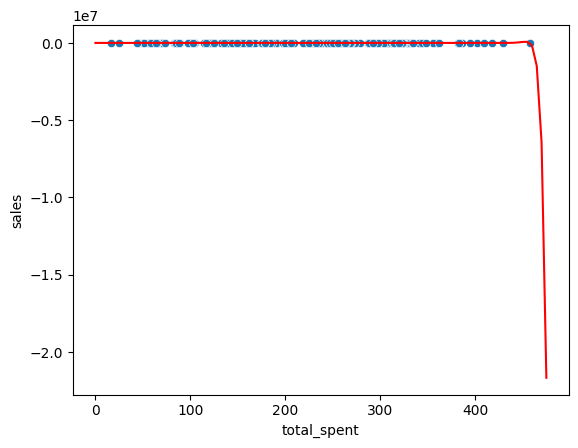

In [11]:
li = list(np.polyfit(X,Y,deg=115))
predicted_sales_3 = 0
for i in range(len(li)):
    predicted_sales_3 += (li[i]*(potential_spend**(len(li)-i-1)))
display(
    sns.scatterplot(x="total_spent",y="sales",data=df),
    plt.plot(potential_spend , predicted_sales_3,color="red")
)

<h3><a id="scikit_learn">Scikit-learn</a></h3>

In [31]:
import sklearn
display(sklearn.__all__)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y)


# template for using scikit-learn
'''
from sklearn.model_family import ModelAlgo
mymodel = ModelAlgo(param1, param2)
mymodel.fit(X_train, y_train)
predictions = mymodel.predict(X_test)
from sklearn.metrics import error_metric
'''

['calibration',
 'cluster',
 'covariance',
 'cross_decomposition',
 'datasets',
 'decomposition',
 'dummy',
 'ensemble',
 'exceptions',
 'experimental',
 'externals',
 'feature_extraction',
 'feature_selection',
 'gaussian_process',
 'inspection',
 'isotonic',
 'kernel_approximation',
 'kernel_ridge',
 'linear_model',
 'manifold',
 'metrics',
 'mixture',
 'model_selection',
 'multiclass',
 'multioutput',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'pipeline',
 'preprocessing',
 'random_projection',
 'semi_supervised',
 'svm',
 'tree',
 'discriminant_analysis',
 'impute',
 'compose',
 'clone',
 'get_config',
 'set_config',
 'config_context',
 'show_versions']

'\nfrom sklearn.model_family import ModelAlgo\nmymodel = ModelAlgo(param1, param2)\nmymodel.fit(X_train, y_train)\npredictions = mymodel.predict(X_test)\nfrom sklearn.metrics import error_metric\n'

In [45]:
df = pd.read_csv("../UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv")


In [46]:
display(
    df.head(),
)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


None

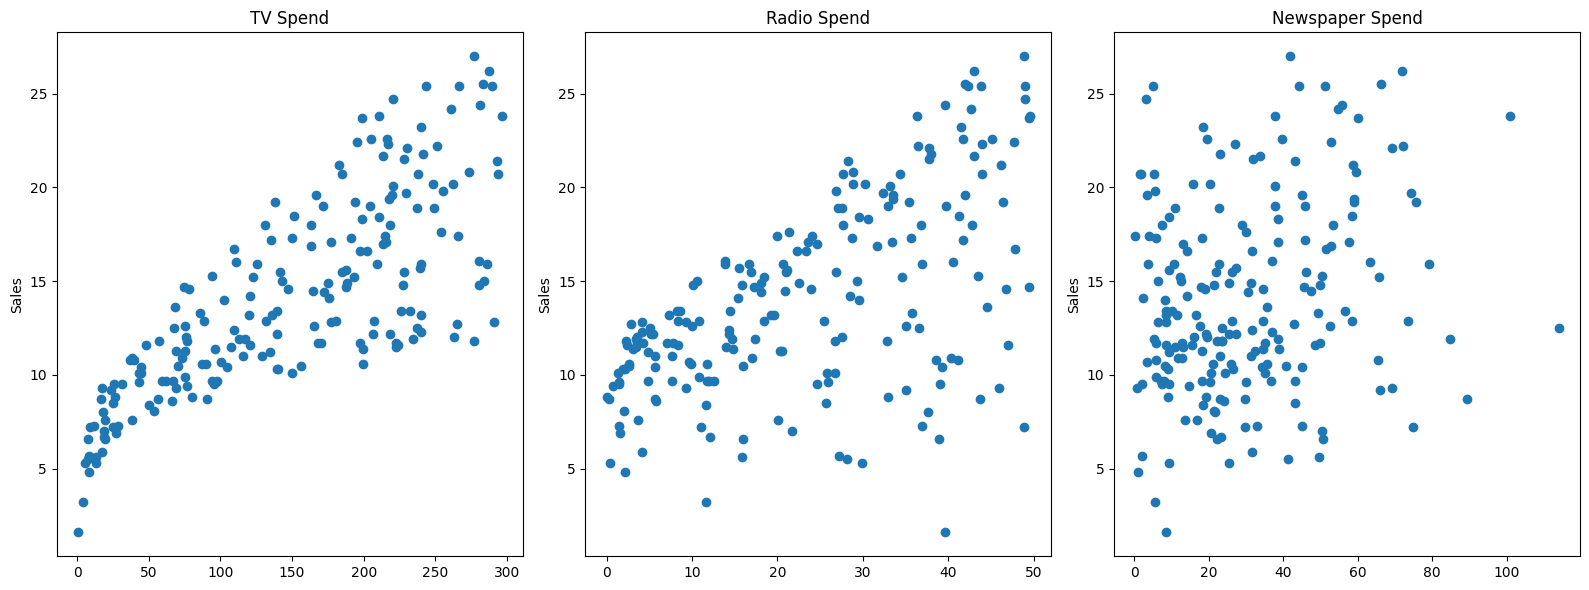

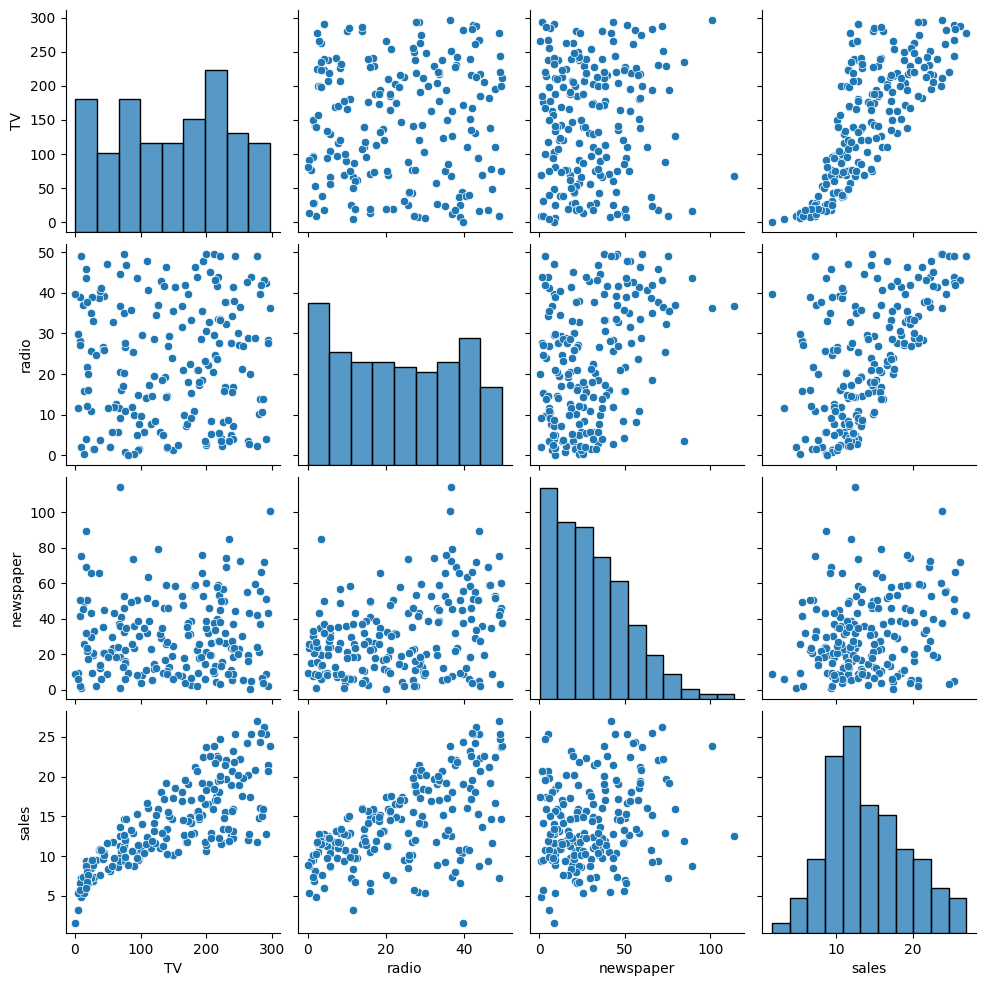

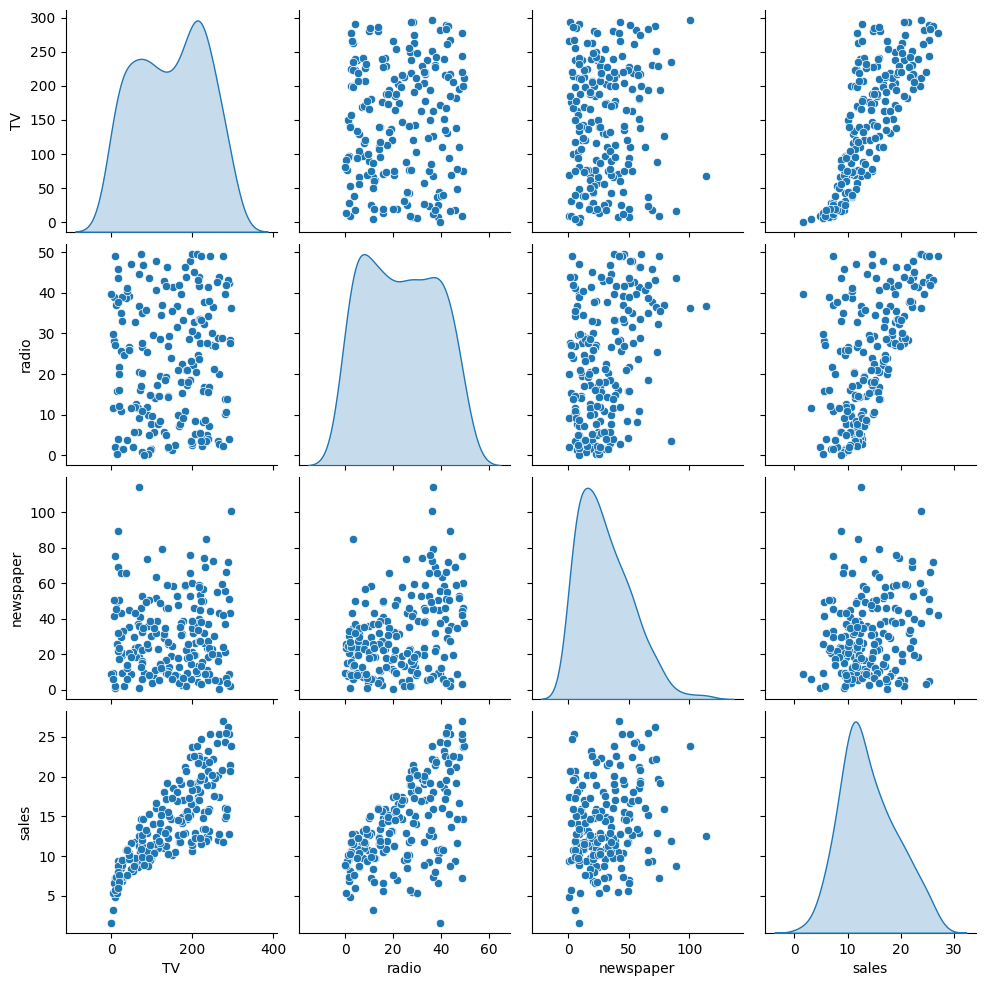

In [47]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
display(
    plt.tight_layout(),
    sns.pairplot(df),
    sns.pairplot(df, diag_kind = "kde"),
)

In [52]:
X = df.drop("sales",axis=1)
X
y = df["sales"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)


<h3><a id="scikit">SciKit Learn</a></h3>
<h4><a id="Intro">Introducing SciKit Learn</a></h4>

We will work a lot with the scitkit learn library, so get comfortable with its model estimator syntax, as well as exploring its incredibly useful documentation!

---

In [53]:
display(
    X_test,
)

,TV,radio,newspaper
173,168.4,7.1,12.8
112,175.7,15.4,2.4
60,53.5,2.0,21.4
164,117.2,14.7,5.4
135,48.3,47.0,8.5
98,289.7,42.3,51.2
48,227.2,15.8,49.9
134,36.9,38.6,65.6
75,16.9,43.7,89.4
39,228.0,37.7,32.0


<h4><a id="Model_creation">Creating a Model (Estimator)</a></h4>

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

<h4><a id="fitting">Fit/Train the Model on the training data</a></h4>

**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [57]:
model.fit(X_train,y_train)

LinearRegression()

<h4><a id="understanding">Understanding and utilizing the Model</a></h4>

<h5><a id="test_set_evaluation">Evaluation on the Test Set (Metrics)</a></h5>

###### *Metrics*

Make sure you've viewed the video on these metrics!
The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

<h6><a id="performance">Calculate Performance on Test Set</a></h6>

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [58]:
# X_test

In [59]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)
display(
    test_predictions,
)

array([11.88156979, 13.78680019,  5.77768916, 11.03993849, 14.10789057,
       24.00046203, 16.16534278, 12.00185444, 12.07944708, 20.36783604,
       12.42846734,  3.78999253,  9.09465148, 11.57139229, 14.15845503,
       18.39979688, 21.39502855, 17.7257613 , 15.64631675, 17.00616106,
       15.12302419, 12.09586976,  6.62294793,  7.44797751,  8.18781963,
       12.30844487, 11.8058541 , 24.68417626,  6.14480339, 12.39273497,
       21.29486741, 15.09047408, 16.26890629, 18.38703964,  8.68059529,
        9.52086292, 17.63568719, 18.39898382, 14.33432698,  8.43470106,
       14.13584724, 13.64891844, 14.67487478, 19.2798509 , 23.26580619,
       10.4835862 , 12.10657135, 15.40653483,  9.87322508, 12.37286998])

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [61]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

display(
    MAE,
    MSE,
    RMSE,
)

1.085138768895757

1.8265574575649355

1.3515019265857284

In [62]:
df['sales'].mean()

14.0225

<h5><a id="residuals">Residuals</a></h5>


Revisiting Anscombe's Quartet: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

<table class="wikitable">
<tbody><tr>
<th>Property
</th>
<th>Value
</th>
<th>Accuracy
</th></tr>
<tr>
<td><a href="/wiki/Mean" title="Mean">Mean</a> of <i>x</i>
</td>
<td>9
</td>
<td>exact
</td></tr>
<tr>
<td>Sample <a href="/wiki/Variance" title="Variance">variance</a> of <i>x</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>11
</td>
<td>exact
</td></tr>
<tr>
<td>Mean of <i>y</i>
</td>
<td>7.50
</td>
<td>to 2 decimal places
</td></tr>
<tr>
<td>Sample variance of <i>y</i>  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma ^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>&#x03C3;<!-- σ --></mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma ^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/53a5c55e536acf250c1d3e0f754be5692b843ef5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.385ex; height:2.676ex;" alt="\sigma ^{2}"/></span>
</td>
<td>4.125
</td>
<td>±0.003
</td></tr>
<tr>
<td><a href="/wiki/Correlation" class="mw-redirect" title="Correlation">Correlation</a> between <i>x</i> and <i>y</i>
</td>
<td>0.816
</td>
<td>to 3 decimal places
</td></tr>
<tr>
<td><a href="/wiki/Linear_regression" title="Linear regression">Linear regression</a> line
</td>
<td><i>y</i>&#160;=&#160;3.00&#160;+&#160;0.500<i>x</i>
</td>
<td>to 2 and 3 decimal places, respectively
</td></tr>
<tr>
<td><a href="/wiki/Coefficient_of_determination" title="Coefficient of determination">Coefficient of determination</a> of the linear regression  :  <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle R^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>R</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle R^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5ce07e278be3e058a6303de8359f8b4a4288264a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.818ex; height:2.676ex;" alt="R^{2}"/></span>
</td>
<td>0.67
</td>
<td>to 2 decimal places
</td></tr></tbody></table>

<h6><a id="anscombes_quartet1">anscombes_quartet1.csv</a></h6>

In [63]:
quartet = pd.read_csv('../UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/anscombes_quartet1.csv')

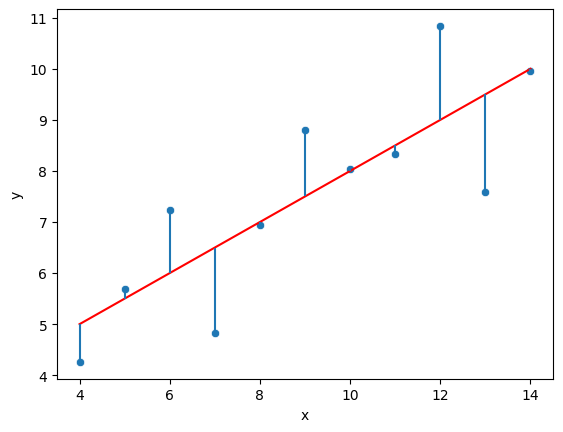

In [64]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<AxesSubplot: xlabel='residual', ylabel='Density'>

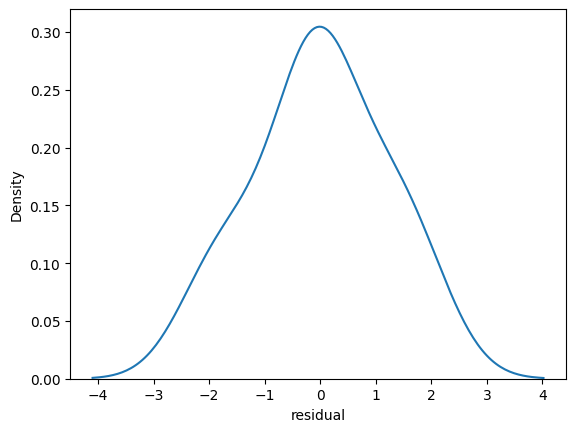

In [65]:
sns.kdeplot(quartet['residual'])

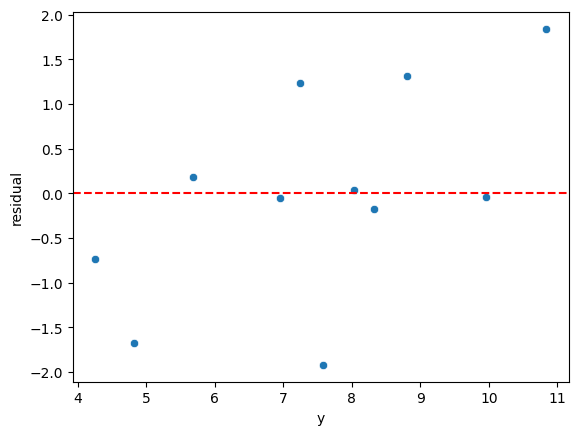

In [66]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

<h6><a id="anscombes_quartet2">anscombes_quartet2.csv</a></h6>

In [67]:
quartet = pd.read_csv('../UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/anscombes_quartet2.csv')

In [68]:
quartet.columns = ['x','y']

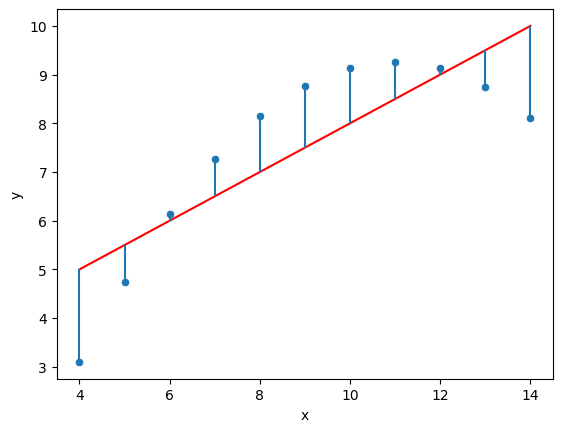

In [70]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<AxesSubplot: xlabel='residual', ylabel='Density'>

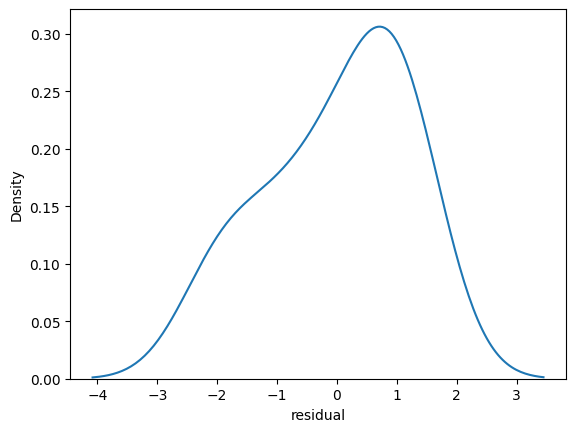

In [71]:
sns.kdeplot(quartet['residual'])

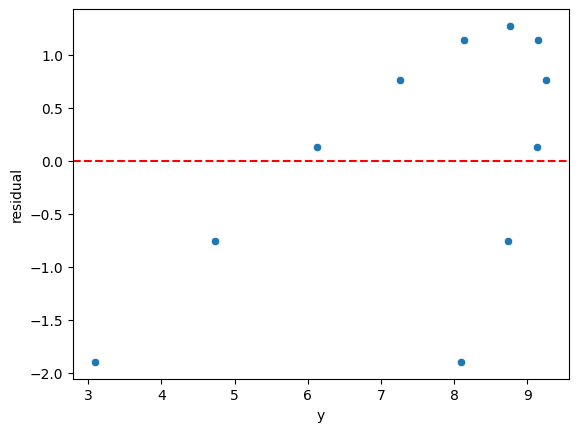

In [72]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

<h6><a id="anscombes_quartet4">anscombes_quartet4.csv</a></h6>

In [74]:
quartet = pd.read_csv('../UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/anscombes_quartet4.csv')
quartet

,x,y
0,8.0,6.58
1,8.0,5.76
2,8.0,7.71
3,8.0,8.84
4,8.0,8.47
5,8.0,7.04
6,8.0,5.25
7,19.0,12.50
8,8.0,5.56
9,8.0,7.91


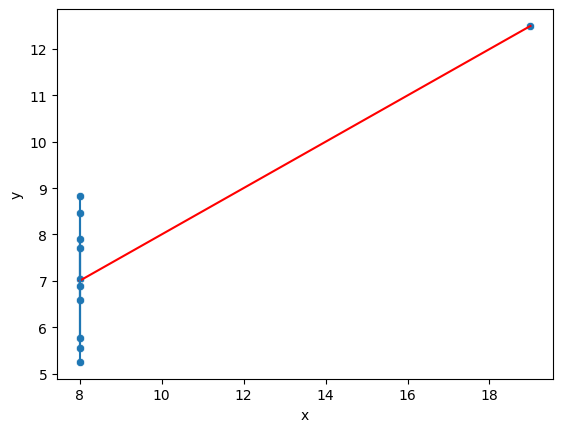

In [76]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

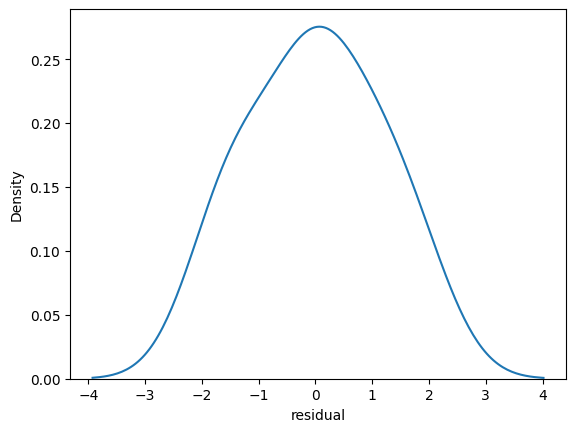

<AxesSubplot: xlabel='residual', ylabel='Density'>

None

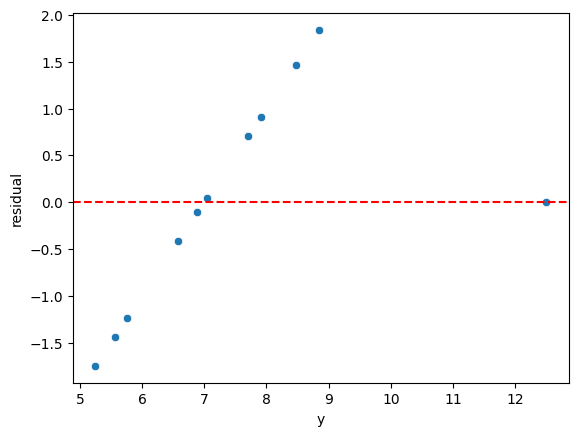

In [79]:
display(
    sns.kdeplot(quartet['residual']),
    plt.show()
)
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

<h6><a id="Plotting_Residuals">Plotting Residuals</a></h6>

It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.

In [80]:
# Predictions on training and testing sets
# Doing residuals separately will alert us to any issue with the split call
test_predictions = model.predict(X_test)

In [81]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions

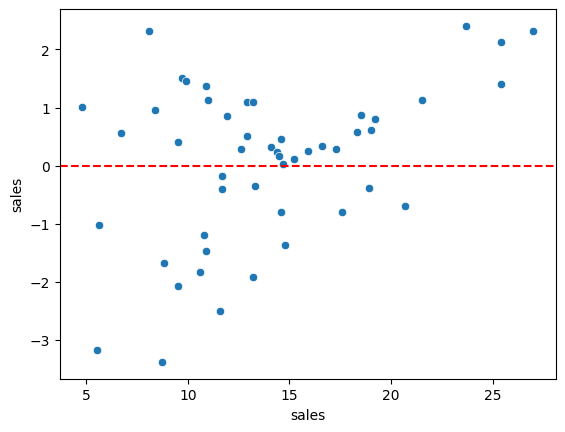

In [82]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [83]:
len(test_res)

50

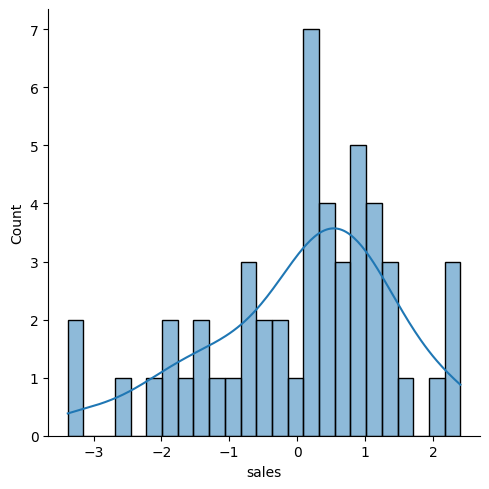

In [84]:
sns.displot(test_res,bins=25,kde=True)

Still unsure if normality is a reasonable approximation? We can check against the [normal probability plot.](https://en.wikipedia.org/wiki/Normal_probability_plot)

In [85]:
import scipy as sp

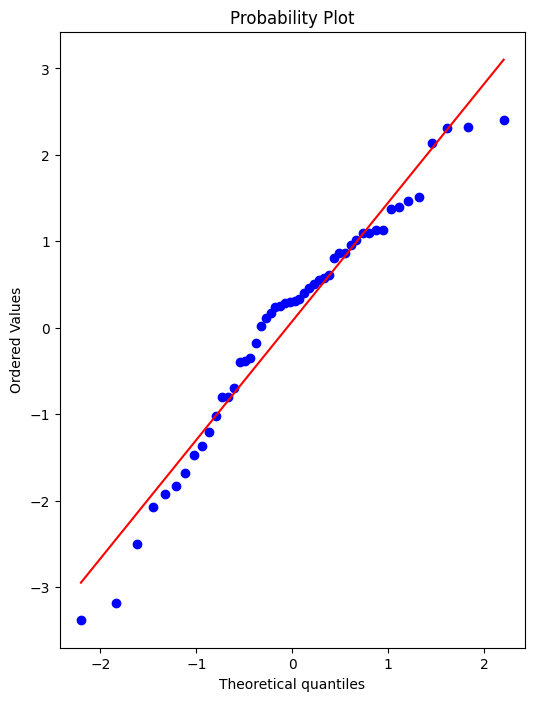

In [86]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

-----------

<h4><a id="retraining"> Retraining Model on Full Data</a></h4>

If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model, something we'll discuss later on).

In [87]:
final_model = LinearRegression()

In [88]:
final_model.fit(X,y)

LinearRegression()

Note how it may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data, its not a fair judgement of performance to calculate RMSE on data its already seen, thus the purpose of the previous examination of test performance.

<h5><a id="dpm">Deployment, Predictions, and Model Attributes</a></h5>

<h6><a id="final_model_fit">Final Model Fit</a></h6>

Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [89]:
y_hat = final_model.predict(X)

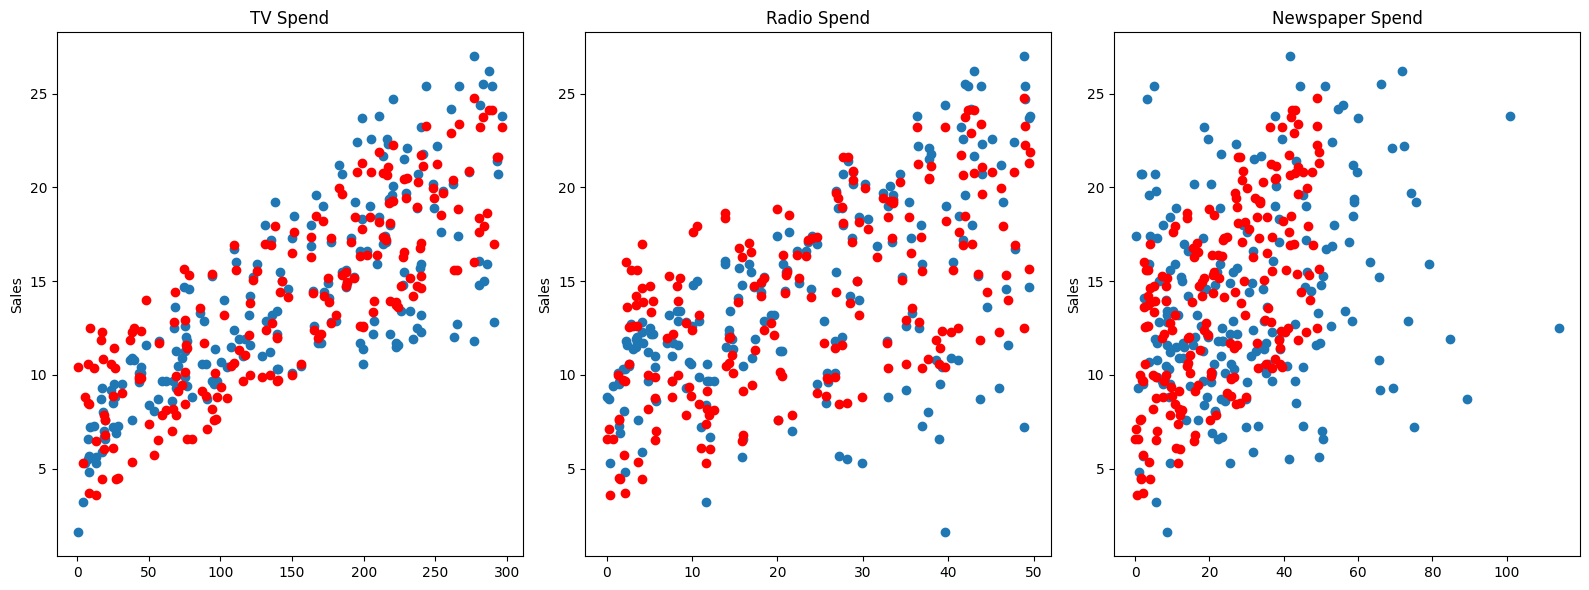

In [90]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

<h6><a id="residuals_2">Residuals</a></h6>

Should be normally distributed as discussed in the video.

In [91]:
residuals = y_hat - y

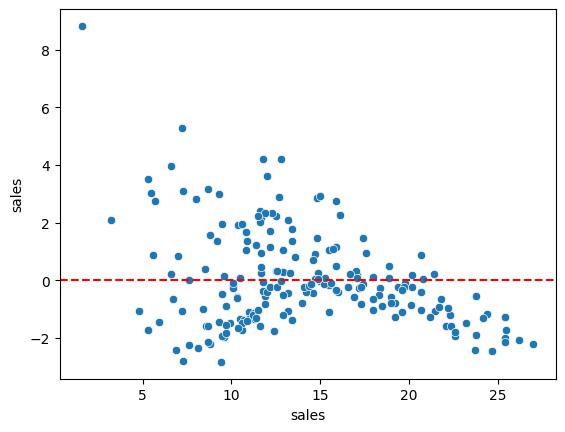

In [92]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

<h6><a id="Coefficients">Coefficients</a></h6>

In [93]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [94]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


Interpreting the coefficients:

---
- Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units . 
- This basically means that for every \$1000 dollars spend on TV Ads, we could expect 45 more units sold.
----
---
---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case 1000s of units . 
* This basically means that for every \$1000 dollars spend on Radio Ads, we could expect 188 more units sold.
----
----
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a **decrease** in sales of  0.001 "sales units", in this case 1000s of units . 
* This basically means that for every \$1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.
---
---
**Note! In this case all our units were the same for each feature (1 unit = $1000 of ad spend). But in other datasets, units may not be the same, such as a housing dataset could try to predict a sale price with both a feature for number of bedrooms and a feature of total area like square footage. In this case it would make more sense to *normalize* the data, in order to clearly compare features and results. We will cover normalization later on.**

In [95]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<h6><a id="predictions_on_new_data">Prediction on New Data</a></h6>

Recall , X_test data set looks *exactly* the same as brand new data, so we simply need to call .predict() just as before to predict sales for a new advertising campaign.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [97]:
campaign = [[149,22,12]]

In [98]:
final_model.predict(campaign)

/Users/sreedhar.k/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

**How accurate is this prediction? No real way to know! We only know truly know our model's performance on the test data, that is why we had to be satisfied by it first, before training our full model**

<h4><a id="Model_Persistence">Model Persistence (Saving and Loading a Model)</a></h4>

In [99]:
from joblib import dump, load

In [101]:
dump(final_model, 'joblib/sales_model.joblib') 

['joblib/sales_model.joblib']

In [102]:
loaded_model = load('joblib/sales_model.joblib')
loaded_model.predict(campaign)

/Users/sreedhar.k/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

<h4><a id="next">Up next...</a></h4>
Is this the best possible performance? Its a simple model still, let's expand on the linear regresion model by taking a further look a regularization!

-------
--------